# ANOMALY BASED INTRUSION DETECTION SYSTEM

## Importing Libraries

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

## Reading the Dataset

In [55]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearning/MTH-IDS/cic-ids-2017/CIC-IDS-2017_sampledataset.csv')

In [56]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,443,2814,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,443,8594,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,443,359,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,53,49057,2,2,66,222,33,33,33.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,53,46968,4,2,124,254,31,31,31.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
df.shape

(76503, 79)

In [ ]:
df['Attack'].value_counts()

1    38325
0    38178
Name: Attack, dtype: int64

### Assigning all the attack values as 1 only. Now 1 represents attack and 0 represents Benign

In [ ]:
df['Attack'][df['Attack'] > 0] = 1

<ipython-input-22-c3523fdcb0c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack'][df['Attack'] > 0] = 1


In [ ]:
df.Attack.value_counts()

1    38325
0    38178
Name: Attack, dtype: int64

### Applying normalization to the data

In [57]:
df.shape

(76503, 79)

In [ ]:
features = df.drop(['Attack'],axis=1).dtypes.index

In [ ]:
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))

### Filling empty values with 0

In [ ]:
df = df.fillna(0)

### Partitioning data into x and y

In [ ]:
y = df.iloc[:, -1].values.reshape(-1,1)
X = df.drop(['Attack'],axis=1).values
y=np.ravel(y)

## Feature selection using Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [ ]:
features = df.dtypes.index

In [ ]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [ ]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.44:
        break

In [ ]:
# x_test = new_df[fs].values

In [ ]:
# X_train = df[fs].values

In [ ]:
# y_test = new_df['Attack']

In [ ]:
# y_train = y[:len(df)]

In [ ]:
# train, test = train_test_split(df, test_size = 0.2)

In [58]:
df = df[fs]

In [59]:
df.head()

,Destination Port,Packet Length Variance,Packet Length Std,Packet Length Mean,Average Packet Size,Max Packet Length,Init_Win_bytes_forward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Max,Fwd Packet Length Mean,Avg Fwd Segment Size,Bwd Packet Length Mean,Avg Bwd Segment Size,Total Length of Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward
0,443,0.000000,0.000000,6.000000,9.000000,6,40656,12,12,6,6.0,6.0,0.0,0.0,0,0,-1
1,443,0.000000,0.000000,0.000000,0.000000,0,320,0,0,0,0.0,0.0,0.0,0.0,0,0,-1
2,443,0.000000,0.000000,0.000000,0.000000,0,350,0,0,0,0.0,0.0,0.0,0.0,0,0,-1
3,53,1825.200000,42.722359,64.200000,80.250000,111,-1,66,66,33,33.0,33.0,111.0,111.0,222,222,-1
4,53,2194.285714,46.843204,58.428571,68.166667,127,-1,124,124,31,31.0,31.0,127.0,127.0,254,254,-1


In [60]:
df['Attack'] = y

In [61]:
df.shape

(76503, 18)

In [62]:
df_sampled = df.sample(frac=0.5, random_state=42)

In [63]:
x = df_sampled.drop('Attack', axis = 1)

In [64]:
x

,Destination Port,Packet Length Variance,Packet Length Std,Packet Length Mean,Average Packet Size,Max Packet Length,Init_Win_bytes_forward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Max,Fwd Packet Length Mean,Avg Fwd Segment Size,Bwd Packet Length Mean,Avg Bwd Segment Size,Total Length of Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward
74416,80,0.000000,0.000000,0.000000,0.000000,0,29200,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,-1
71595,80,29841.777780,172.747729,59.555556,67.000000,520,29200,536,536,520,107.200000,107.200000,0.000000,0.000000,0,0,235
63099,22,35944.471350,189.590272,88.018519,89.679245,976,29200,2008,2008,640,95.619048,95.619048,85.781250,85.781250,2745,2745,247
18775,443,739770.323100,860.099019,794.392157,810.280000,2896,65535,871,871,389,43.550000,43.550000,1321.433333,1321.433333,39643,39643,122
50776,80,0.000000,0.000000,0.000000,0.000000,0,29200,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,28960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55994,21,65.333333,8.082904,7.000000,9.333333,14,229,14,14,14,7.000000,7.000000,0.000000,0.000000,0,0,0
53129,21,65.333333,8.082904,9.333333,14.000000,14,229,14,14,14,7.000000,7.000000,0.000000,0.000000,0,0,-1
54896,21,156.083333,12.493332,11.600000,12.083333,34,29200,102,102,21,11.333333,11.333333,12.533333,12.533333,188,188,227
63480,22,0.000000,0.000000,0.000000,0.000000,0,259,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,247


In [65]:
y = df_sampled['Attack']

In [66]:
y

74416    1.0
71595    1.0
63099    1.0
18775    0.0
50776    1.0
        ... 
55994    1.0
53129    1.0
54896    1.0
63480    1.0
29702    1.0
Name: Attack, Length: 38252, dtype: float64

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.70, random_state=2)

In [68]:
X_train1 = X_train.values
x_test1 = X_test.values
y_train1 = Y_train.values
y_test1 = Y_test.values

### Creating train and test data

In [69]:
X_train.shape

(26776, 17)

In [ ]:
# X_train1 = X_train[:len(df)]
# y_train1 = y[:len(df)]
# X_test1 = x_test
# y_test1 = y_test

## Using WCSS for finding best value of K

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
# finding wcss values for different number of clusters
wcss = []
for i in range(1, 50):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans.fit(X_train1)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

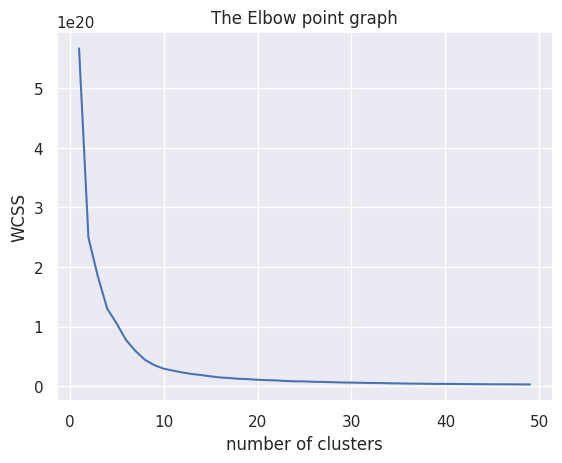

In [ ]:
sns.set()
plt.plot(range(1, 50), wcss)
plt.title('The Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

## Using Silhoutte Score for finding best value of K

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
ssd =[]

for k in range(2,50):
    model = KMeans(n_clusters=k)
    model.fit(X_train1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_train1, model.labels_)}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.8188525068887718


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.8261430752401272


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.8106526669458683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.8155653561015183


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.8308255977718804


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.8451001494007463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.8463048728361308


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.8575288754614183


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.8577712953670593


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 11 clusters: 0.85499889584001


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 12 clusters: 0.856776978704784


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 13 clusters: 0.8608403611215478


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 14 clusters: 0.8626924598279015


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 15 clusters: 0.7139563375292424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 16 clusters: 0.7160632793396629


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 17 clusters: 0.7180804812275137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 18 clusters: 0.7198210282859157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 19 clusters: 0.7264877930730911


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 20 clusters: 0.7224178269394622


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 21 clusters: 0.7286085985012194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 22 clusters: 0.7280316919842489


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 23 clusters: 0.7280128605686929


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 24 clusters: 0.7387600840109004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 25 clusters: 0.7336007488240408


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 26 clusters: 0.7379434949874939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 27 clusters: 0.7373733135038034


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 28 clusters: 0.7467825492570063


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 29 clusters: 0.7464475201667016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 30 clusters: 0.7459722136488663


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 31 clusters: 0.7591653593920227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 32 clusters: 0.7487545305418137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 33 clusters: 0.7625985549258361


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 34 clusters: 0.757110915389069


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 35 clusters: 0.7454638468000169


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 36 clusters: 0.76988789664562


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 37 clusters: 0.7654412971217703


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 38 clusters: 0.7555485803236539


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 39 clusters: 0.7496603785547832


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 40 clusters: 0.7496450431011793


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 41 clusters: 0.7605375403880363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 42 clusters: 0.7655489144124733


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 43 clusters: 0.766263357454113


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 44 clusters: 0.7503668717488269


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 45 clusters: 0.774035214361801


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 46 clusters: 0.7689866747971047


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 47 clusters: 0.7303200703667407


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 48 clusters: 0.7534141792187665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 49 clusters: 0.7669215638734024


In [86]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import time

def CL_kmeans(X_train, X_test, y_train, y_test, n, b=100):
    start_time = time.time()

    km_cluster = MiniBatchKMeans(n_clusters=n, batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    cluster_creation_time = time.time() - start_time

    count = 0
    a = np.zeros(n)  # a[i] is normal samples in cluster i
    count_b = np.zeros(n)
    for v in range(0, n):
        for i in range(0, len(y_train)):
            if result[i] == v:
                if y_train[i] == 1:  # sample is an attack
                    a[v] = a[v] + 1
                else:
                    count_b[v] = count_b[v] + 1

    list1 = []  # normal cluster
    list2 = []  # attack cluster
    for v in range(0, n):
        if a[v] <= count_b[v]:
            list1.append(v)
        else:
            list2.append(v)

    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for v in range(0, len(y_test)):
        if result2[v] in list1:
            result2[v] = 0
        elif result2[v] in list2:
            result2[v] = 1
        else:
            print("-1")

        if y_test[v] == 1 and result2[v] == 1:
            true_positives += 1
        elif y_test[v] == 0 and result2[v] == 1:
            false_positives += 1
        elif y_test[v] == 0 and result2[v] == 0:
            true_negatives += 1
        elif y_test[v] == 1 and result2[v] == 0:
            false_negatives += 1

    print("True Positives:", true_positives)
    print("False Positives:", false_positives)
    print("True Negatives:", true_negatives)
    print("False Negatives:", false_negatives)

    print(classification_report(y_test, result2))
    cm = confusion_matrix(y_test, result2)
    acc = metrics.accuracy_score(y_test, result2)
    print(str(acc))
    print(cm)

    classification_time = time.time() - cluster_creation_time - start_time
    print("Cluster Creation Time:", cluster_creation_time)
    print("Classification Time:", classification_time)

    cm_df = pd.DataFrame(
        [[true_negatives, false_positives], [false_negatives, true_positives]],
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [87]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26776, 17) (11476, 17) (26776,) (11476,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True Positives: 5624
False Positives: 162
True Negatives: 5586
False Negatives: 104
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      5748
         1.0       0.97      0.98      0.98      5728

    accuracy                           0.98     11476
   macro avg       0.98      0.98      0.98     11476
weighted avg       0.98      0.98      0.98     11476

0.9768211920529801
[[5586  162]
 [ 104 5624]]
Cluster Creation Time: 75.58177304267883
Classification Time: 427.0797038078308


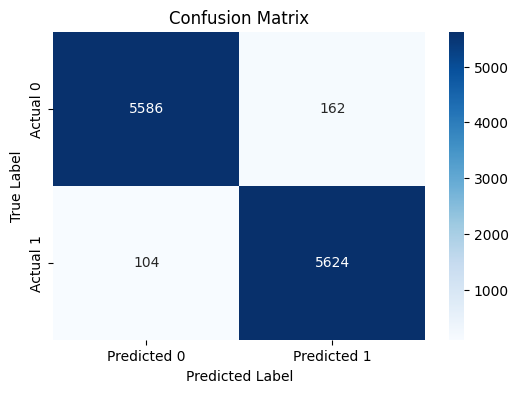

In [88]:
CL_kmeans(X_train1, x_test1, y_train1, y_test1, 6700)